In [36]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pickle5 as pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image


In [2]:
## PREP
def save_as_pickle(obj, filename):
    """
    save an object in a pickle file dump
    :param obj: object to dump
    :param filename: target file
    :return:
    """
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(filename):
    """
    load an object from a given pickle file
    :param filename: source file
    :return: loaded object
    """
    with open(filename, 'rb') as file:
        return pickle.load(file)


In [3]:
outname= "fine_tune_batchsize5_epoch200"
for i in range(37):
    features = np.array(load_pickle(f"/work-ceph/lprasse/siegel/features/{outname}/train_{i}.pkl").cpu())
    if i == 0:
        X = features
    else:
        X = np.append(X,features, axis=0)

#X = StandardScaler().fit_transform(X)
print(X.shape)

(7345, 2048)


In [31]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 3516


In [32]:
filenames = load_pickle(f"/work-ceph/lprasse/siegel/features/{outname}/filenames.pkl")
print(len(filenames))

7345


In [33]:
cluster = zip(labels, filenames)

results = {}

for (label, filename) in cluster:
    if label in results:
        results[label].append(filename)
    else:
        results[label]=[filename]
        
print(len(results[0]))
print(len(results[1]))
print(len(results[2]))
print(len(results[3]))
print(len(results[4]))
print(len(results[5]))

3829


KeyError: 1

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1086.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1088.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1089.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1090.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1091.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1092.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1093.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1094.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1095.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1096.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1097.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1098.jpg
/work-ceph/lprasse/siegel/data/siegel_gr

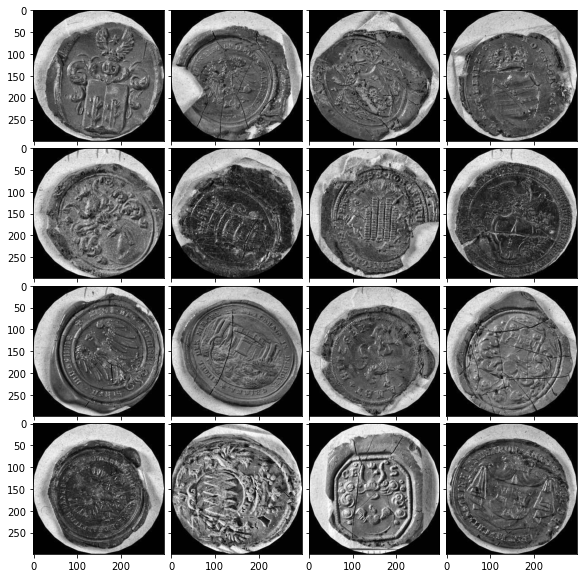

In [43]:
cluster_1 = results[0]

print_cluster1 = cluster_1[16:32]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

Text(0.5, 1.0, 'Estimated number of clusters: 1')

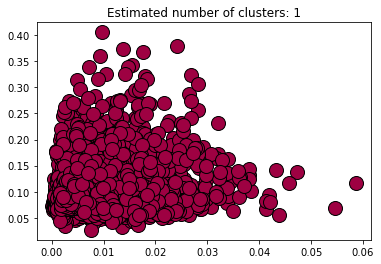

In [20]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)